In [1]:
import sys
sys.path.append('/Users/jonasronning/Documents/Work/Numerics/Old Projects/ComFiT')

import comfit as cf
import matplotlib.pyplot as plt
import numpy as np

### Task 1: initialise a bec in two dimensions with resolution 101 in x and y. Make gamma = 0.05 
bec = cf.BEC(2,xRes=101,yRes=101,gamma=0.05,dt=0.1)

### First we set the size of the harmonic
R_tf = 40

### Here we set the size and velocity of the stirrer
stirrer_radius = 20
stirrer_velocity = 0.6
freq = stirrer_velocity/stirrer_radius
size =4
strength = .9

### Defining the function for the time-dependent potential
def V_t():
    pos_x = bec.xmid + stirrer_radius * np.cos(freq * bec.t)
    pos_y = bec.ymid + stirrer_radius * np.sin(freq * bec.t)
    stirrer = bec.calc_gaussian_stirring_potential(size, strength, [pos_x, pos_y])
    harmonic = bec.calc_harmonic_potential(R_tf)
    return   harmonic + stirrer






Relaxing the BEC...


evolving the dGPE: 100%|███████████████████████| 50/50 [00:00<00:00, 677.52it/s]


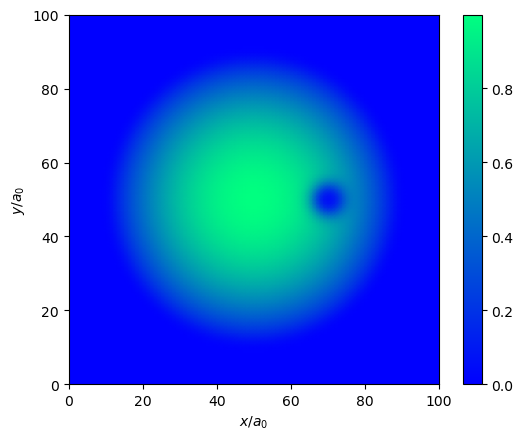

In [2]:
######## task 2 #########
bec.V0 = V_t()

bec.conf_initial_condition_Thomas_Fermi()

bec.evolve_relax_BEC(50) 

bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'winter')
plt.show()

evolving the dGPE: 100%|███████████████████| 3000/3000 [00:09<00:00, 314.70it/s]


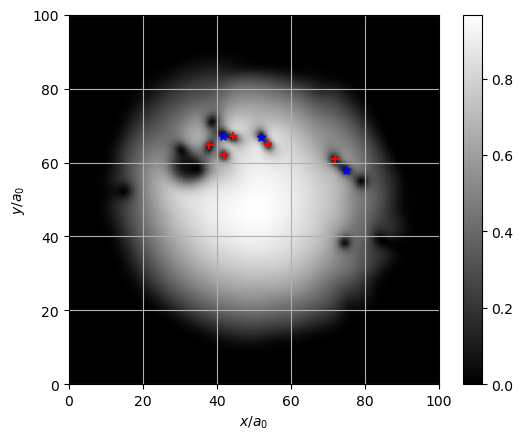

In [3]:
#### task 3, 4 and 5

bec.conf_time_dependent_potential(V_t)

bec.evolve_dGPE( 3000, method='ETD4RK') 

nodes = bec.calc_vortex_nodes()

ax=bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'gray')
bec.plot_vortex_nodes(nodes,ax)
plt.show()

evolving the dGPE: 100%|███████████████████| 2000/2000 [00:05<00:00, 338.34it/s]


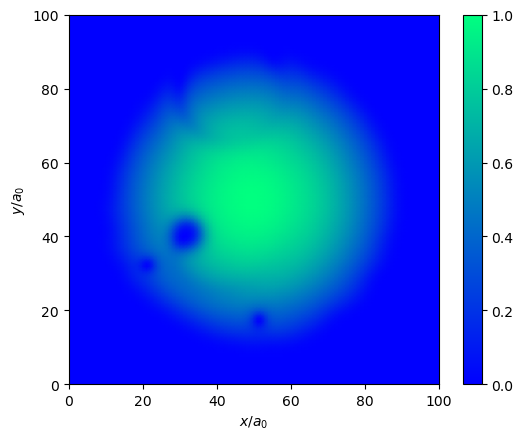

In [5]:
bec.V0 = V_t()


bec.V_ext = lambda: bec.V0

timesteps = int(200/bec.dt)
bec.evolve_dGPE(timesteps,'ETD4RK')


bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'winter')
plt.show()